Q-4. Imagine you working as a sale manager now you need to predict the Revenue and whether that particular revenue is on the weekend or not and find the Informational_Duration using the Ensemble learning algorithm.                              
Dataset - https://www.kaggle.com/datasets/henrysue/online-shoppers-intention                                  
This is the Dataset You can use this dataset for this question.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [4]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
df.Revenue = df.Revenue.astype('int')
df.Weekend = df.Weekend.astype('int')

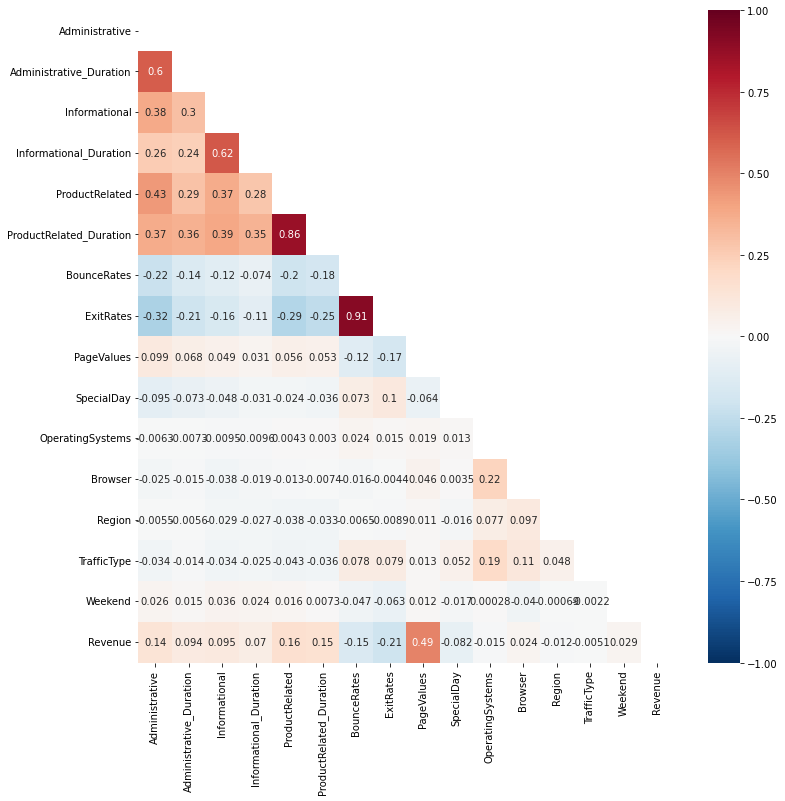

In [7]:
# co-relation between data
matrix = np.triu(df.corr())
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, ax=ax, vmin=-1, vmax=1, center= 0, mask=matrix, cmap='RdBu_r')
plt.show()

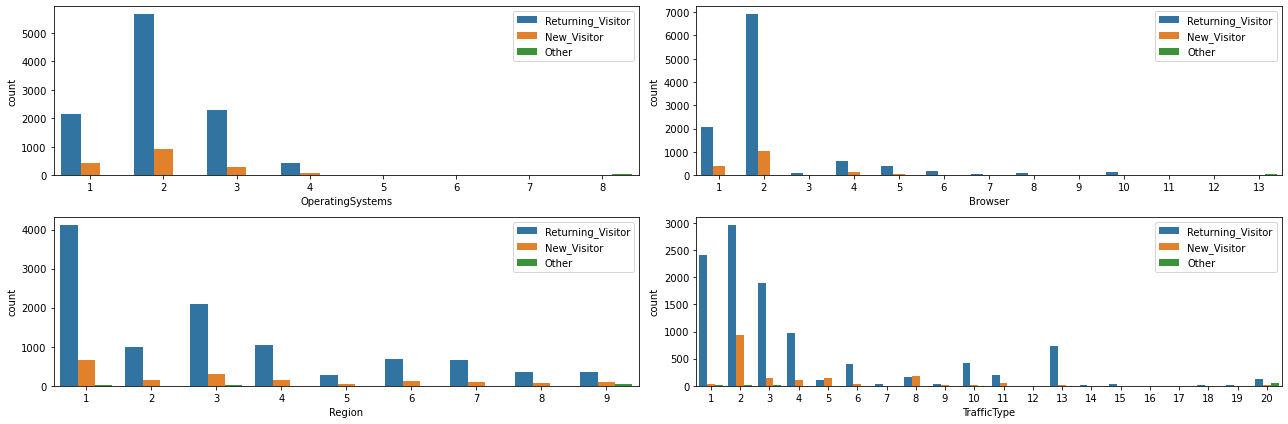

In [8]:
#visitor Analysis
fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

sns.countplot(data=df, x='OperatingSystems', hue='VisitorType', ax=ax1)
sns.countplot(data=df, x='Browser', hue='VisitorType', ax=ax2)
sns.countplot(data=df, x='Region', hue='VisitorType', ax=ax3)
sns.countplot(data=df, x='TrafficType', hue='VisitorType', ax=ax4)

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')
ax4.legend(loc='upper right')
plt.tight_layout()
plt.show()

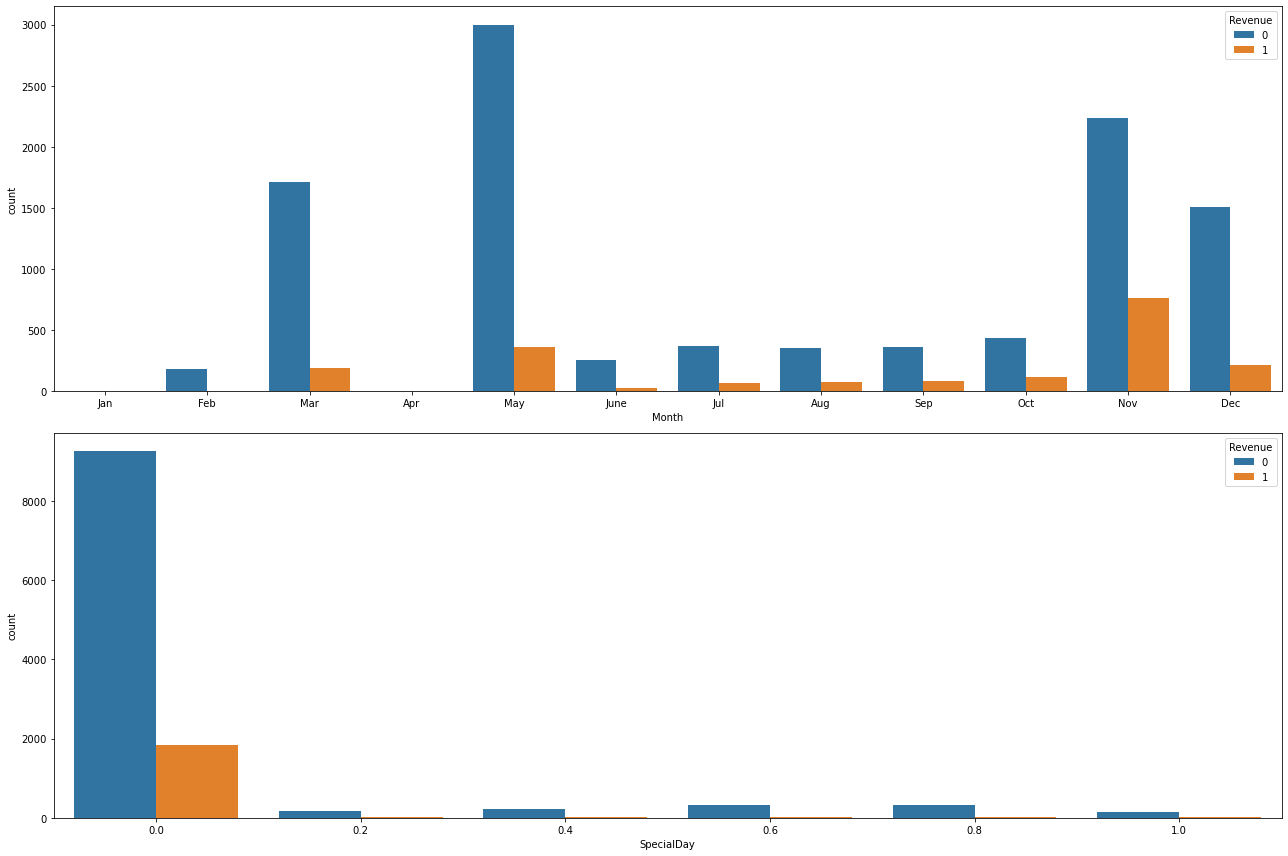

In [9]:
# Visit Date Analysis
fig = plt.figure(figsize=(18, 12))

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

orderlist = ['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec']
sns.countplot(data=df, x='Month', hue='Revenue', ax=ax1, order=orderlist)
sns.countplot(data=df, x='SpecialDay', hue='Revenue', ax=ax2)

plt.tight_layout()
plt.show()

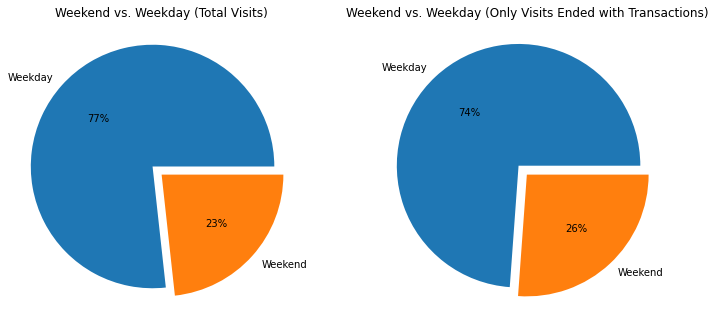

In [10]:
fig, ax = plt.subplots(1, 2,figsize=(12, 6), subplot_kw=dict(aspect="equal"))
ax[0].pie(df['Weekend'].value_counts(),explode=(0.1,0),labels=['Weekday','Weekend'], autopct='%1.0f%%')
ax[0].set_title('Weekend vs. Weekday (Total Visits)')
ax[1].pie(df[df['Revenue'] == 1]['Weekend'].value_counts(),explode=(0.1,0),labels=['Weekday','Weekend'], autopct='%1.0f%%')
ax[1].set_title('Weekend vs. Weekday (Only Visits Ended with Transactions)')
#fig.suptitle('Weekend Visits')
plt.show()

**Data Transformation**

In [11]:
df = pd.concat([df,pd.get_dummies(df['Month'], prefix='Month')], axis=1).drop(['Month'],axis=1)
df = pd.concat([df,pd.get_dummies(df['VisitorType'], prefix='VisitorType')], axis=1).drop(['VisitorType'],axis=1)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  OperatingSystems               12330 non-null  int64  
 11  Browser                        12330 non-null  int64  
 12  Region                         12330 non-null 

In [12]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score

In [13]:
# Split the dataset into training and testing sets
X = df.drop('Revenue', axis=1)
y = df['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Ensemble model for Revenue prediction
revenue_model = RandomForestRegressor(n_estimators=100, random_state=42)
revenue_model.fit(X_train, y_train)

# Make predictions for Revenue
revenue_predictions = revenue_model.predict(X_test)

# Evaluation metrics for Revenue prediction
mse = mean_squared_error(y_test, revenue_predictions)
mae = mean_absolute_error(y_test, revenue_predictions)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

# Ensemble model for Weekend/Weekday classification
weekday_model = RandomForestClassifier(n_estimators=100, random_state=42)
weekday_model.fit(X_train, y_train)

# Make predictions for Weekend/Weekday
weekday_predictions = weekday_model.predict(X_test)

# Evaluation metrics for Weekend/Weekday classification
accuracy = accuracy_score(y_test, weekday_predictions)
print("Accuracy:", accuracy)

# Ensemble model for Informational_Duration prediction
info_duration_model = RandomForestRegressor(n_estimators=100, random_state=42)
info_duration_model.fit(X_train, y_train)

# Make predictions for Informational_Duration
info_duration_predictions = info_duration_model.predict(X_test)

# Evaluation metrics for Informational_Duration prediction
mse_info = mean_squared_error(y_test, info_duration_predictions)
mae_info = mean_absolute_error(y_test, info_duration_predictions)
print("Mean Squared Error (Informational_Duration):", mse_info)
print("Mean Absolute Error (Informational_Duration):", mae_info)

Mean Squared Error: 0.07563909164639092
Mean Absolute Error: 0.14450932684509327
Accuracy: 0.8909164639091647
Mean Squared Error (Informational_Duration): 0.07563909164639092
Mean Absolute Error (Informational_Duration): 0.14450932684509327
